## Imports and pip install Fred API

In [ ]:
!pip install fredapi > /dev/null

In [ ]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = '56641b8407fcb3d0079e829591f6998e'

## 1. Create The Fred Object

In [ ]:
fred = Fred(api_key=fred_key)

## 2. Search for Economic Data from Fred

In [ ]:
sp_search = fred.search('S&P', order_by = 'popularity')

In [ ]:
sp_search

id realtime_start realtime_end  \
series id                                                        
BAMLH0A0HYM2          BAMLH0A0HYM2     2024-04-16   2024-04-16   
CSUSHPINSA              CSUSHPINSA     2024-04-16   2024-04-16   
SP500                        SP500     2024-04-16   2024-04-16   
MEHOINUSA672N        MEHOINUSA672N     2024-04-16   2024-04-16   
BAMLH0A0HYM2EY      BAMLH0A0HYM2EY     2024-04-16   2024-04-16   
...                            ...            ...          ...   
DDDI12SMA156NWDB  DDDI12SMA156NWDB     2024-04-16   2024-04-16   
DDDI01GTA156NWDB  DDDI01GTA156NWDB     2024-04-16   2024-04-16   
Q03069USQ605NNBR  Q03069USQ605NNBR     2024-04-16   2024-04-16   
CSHXCPVEA156NRUG  CSHXCPVEA156NRUG     2024-04-16   2024-04-16   
CSHMCPNPA156NRUG  CSHMCPNPA156NRUG     2024-04-16   2024-04-16   

                                                              title  \
series id                                                             
BAMLH0A0HYM2      ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA        S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                       S&P 500   
MEHOINUSA672N     Real Median Household Income in the United States   
BAMLH0A0HYM2EY         ICE BofA US High Yield Index Effective Yield   
...                                                             ...   
DDDI12SMA156NWDB  Private Credit by Deposit Money Banks and Othe...   
DDDI01GTA156NWDB  Private Credit by Deposit Money Banks to GDP f...   
Q03069USQ605NNBR  Revenue Freight Tons Originated, Less Than Car...   
CSHXCPVEA156NRUG  Share of Merchandise Exports at Current Purcha...   
CSHMCPNPA156NRUG  Share of Merchandise Imports at Current Purcha...   

                 observation_start observation_end     frequency  \
series id                                                          
BAMLH0A0HYM2            1996-12-31      2024-04-15  Daily, Close   
CSUSHPINSA              1987-01-01      2024-01-01       Monthly   
SP500                   2014-04-17      2024-04-16  Daily, Close   
MEHOINUSA672N           1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY          1996-12-31      2024-04-15  Daily, Close   
...                            ...             ...           ...   
DDDI12SMA156NWDB        2001-01-01      2018-01-01        Annual   
DDDI01GTA156NWDB        1960-01-01      2020-01-01        Annual   
Q03069USQ605NNBR        1920-01-01      1943-07-01     Quarterly   
CSHXCPVEA156NRUG        1950-01-01      2019-01-01        Annual   
CSHMCPNPA156NRUG        1960-01-01      2019-01-01        Annual   

                 frequency_short                           units  \
series id                                                          
BAMLH0A0HYM2                   D                         Percent   
CSUSHPINSA                     M              Index Jan 2000=100   
SP500                          D                           Index   
MEHOINUSA672N                  A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY                 D                         Percent   
...                          ...                             ...   
DDDI12SMA156NWDB               A                         Percent   
DDDI01GTA156NWDB               A                         Percent   
Q03069USQ605NNBR               Q               Thousands of Tons   
CSHXCPVEA156NRUG               A                         Percent   
CSHMCPNPA156NRUG               A                         Percent   

                               units_short      seasonal_adjustment  \
series id                                                             
BAMLH0A0HYM2                             %  Not Seasonally Adjusted   
CSUSHPINSA              Index Jan 2000=100  Not Seasonally Adjusted   
SP500                                Index  Not Seasonally Adjusted   
MEHOINUSA672N     2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                           %  Not Seaso

## 3. Pull Raw Data & Plot

In [ ]:
sp500 = fred.get_series(series_id = 'SP500')

<Axes: title={'center': 'S&P 500'}>

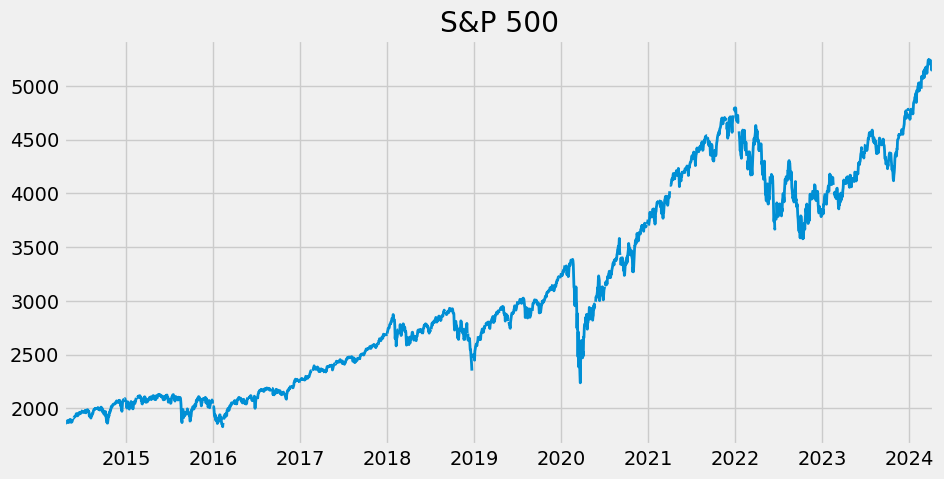

In [ ]:
sp500.plot(figsize=(10, 5), title = "S&P 500", lw =2)

## 4. Pull and Join Multiple Data Series





In [ ]:
unemp_df = fred.search('unemployment rate state', filter = ("frequency", 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [ ]:
all_results=[]
for myid in unemp_df.index:
  results = fred.get_series(myid)
  results = results.to_frame(name=myid)
  all_results.append(results)
uemp_results = pd.concat(all_results, axis = 1 ).drop(['M08311USM156SNBR'], axis = 1)


In [ ]:
uemp_states = uemp_results.drop('UNRATE', axis = 1)
#uemp_states = uemp_states.dropna()

In [ ]:
uemp_states

LNS14000006  CAUR  TXUR  M0892AUSM156SNBR  LNS14000024  \
1929-04-01          NaN   NaN   NaN              0.69          NaN   
1929-05-01          NaN   NaN   NaN              1.65          NaN   
1929-06-01          NaN   NaN   NaN              2.06          NaN   
1929-07-01          NaN   NaN   NaN              0.79          NaN   
1929-08-01          NaN   NaN   NaN              0.04          NaN   
...                 ...   ...   ...               ...          ...   
2023-11-01          5.8   5.1   3.9               NaN          3.4   
2023-12-01          5.2   5.1   3.9               NaN          3.4   
2024-01-01          5.3   5.2   3.9               NaN          3.4   
2024-02-01          5.6   5.3   3.9               NaN          3.5   
2024-03-01          6.4   NaN   NaN               NaN          3.5   

            LNS14000031  M0892BUSM156SNBR  NYUR  U2RATE  FLUR  LNS14000002  \
1929-04-01          NaN               NaN   NaN     NaN   NaN          NaN   
1929-05-01          NaN               NaN   NaN     NaN   NaN          NaN   
1929-06-01          NaN               NaN   NaN     NaN   NaN          NaN   
1929-07-01          NaN               NaN   NaN     NaN   NaN          NaN   
1929-08-01          NaN               NaN   NaN     NaN   NaN          NaN   
...                 ...               ...   ...     ...   ...          ...   
2023-11-01          6.3               NaN   4.6     1.8   3.1          3.4   
2023-12-01          4.6               NaN   4.6     1.8   3.1          3.6   
2024-01-01          5.3               NaN   4.5     1.8   3.1          3.4   
2024-02-01          6.1               NaN   4.4     1.9   3.1          3.9   
2024-03-01          6.2               NaN   NaN     1.8   NaN          3.9   

            LNS14000009  LNS14000003  PAUR  OHUR  LNS14000001  LNS14027660  \
1929-04-01          NaN          NaN   NaN   NaN          NaN          NaN   
1929-05-01          NaN          NaN   NaN   NaN          NaN          NaN   
1929-06-01          NaN          NaN   NaN   NaN          NaN          NaN   
1929-07-01          NaN          NaN   NaN   NaN          NaN          NaN   
1929-08-01          NaN          NaN   NaN   NaN          NaN          NaN   
...                 ...          ...   ...   ...          ...          ...   
2023-11-01          4.6          3.3   3.4   3.6          4.0          4.1   
2023-12-01          5.0          3.5   3.4   3.6          3.9          4.2   
2024-01-01          5.0          3.4   3.4   3.7          3.9          4.3   
2024-02-01          5.0          3.4   3.4   3.7          3.8          4.2   
2024-03-01          4.5          3.4   NaN   NaN          3.7          4.1   

            MIUR  LNS14027662  ALUR  LNS14024887  MAUR  NCUR  ILUR  NJUR  \
1929-04-01   NaN          NaN   NaN          NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN          NaN   NaN          NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN          NaN   NaN          NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN          NaN   NaN          NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN          NaN   NaN          NaN   NaN   NaN   NaN   NaN   
...          ...          ...   ...          ...   ...   ...   ...   ...   
2023-11-01   4.1          2.1   2.8          8.0   3.3   3.6   4.7   4.8   
2023-12-01   4.1          2.1   2.8          8.0   3.2   3.6   4.7   4.8   
2024-01-01   4.0          2.1   2.9          7.3   3.0   3.5   4.7   4.8   
2024-02-01   3.9          2.2   3.0          8.8   2.9   3.5   4.8   4.8   
2024-03-01   NaN          2.1   NaN          8.8   NaN   NaN   NaN   NaN   

            GAUR  COUR  AZUR  WIUR  VAUR  KYUR  LRUN64TTUSM156S  SCUR  NMUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN              NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN              NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN              NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN              NaN   Na

In [ ]:
#plot States Unemployment Rate
#px.line(uemp_states)

## Pull Unemployment Rate per State and Plotting April 2020

In [ ]:
uemp_states.columns[~uemp_states.columns.str.contains('UR')]

Index(['LNS14000006', 'M0892AUSM156SNBR', 'LNS14000024', 'LNS14000031',
       'M0892BUSM156SNBR', 'U2RATE', 'LNS14000002', 'LNS14000009',
       'LNS14000003', 'LNS14000001', 'LNS14027660', 'LNS14027662',
       'LNS14024887', 'LRUN64TTUSM156S', 'LNS14032183', 'LNS14000012',
       'LNS14027659', 'LASMT261982000000003', 'LNS14000060', 'LNS14000028',
       'LASMT391746000000003', 'LNS14000018', 'LNS14000036', 'LNS14000032',
       'LNS14200000', 'LRUN24TTUSM156S', 'LNS14027689', 'LNS14100000',
       'LNS14000315', 'LNS14000029', 'LNS14024230', 'LNS14000025',
       'LNS14000061', 'LRUNTTTTUSM156S', 'LNS14000026', 'LNS14000048',
       'LNS14000089', 'LNS14000150', 'LRUN25TTUSM156S'],
      dtype='object')

In [ ]:
uemp_states = uemp_states.drop(uemp_states.columns[~uemp_states.columns.str.contains('UR')], axis = 1)

In [ ]:
uemp_states.index[len(uemp_states.index)-1]

Timestamp('2024-03-01 00:00:00')

In [ ]:
uemp_states.columns

Index(['CAUR', 'TXUR', 'NYUR', 'FLUR', 'PAUR', 'OHUR', 'MIUR', 'ALUR', 'MAUR',
       'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR', 'WIUR', 'VAUR', 'KYUR',
       'SCUR', 'NMUR', 'MNUR', 'TNUR', 'WAUR', 'MDUR', 'ORUR', 'WVUR', 'NVUR',
       'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR', 'PRUR', 'INUR', 'LAUR',
       'HIUR', 'NDUR', 'MTUR', 'DCUR', 'MSUR', 'MEUR', 'NEUR', 'CTUR', 'IDUR',
       'NHUR', 'RIUR', 'KSUR', 'WYUR', 'DEUR', 'VTUR', 'SDUR', 'CMWRUR',
       'CSOUUR', 'CNERUR', 'CWSTUR', 'CNEWUR'],
      dtype='object')

In [ ]:
uemp_states2 = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states2.columns = [id_to_state[c] for c in uemp_states.columns]

In [ ]:
fig = px.line(uemp_states2)
#fig.update_yaxes(range=[uemp_states.index[0], uemp_states.index[len(uemp_states.index)-1]])
fig.show()

In [ ]:
uemp_states.loc[uemp_states.index == '2020-4-01'].T

2020-04-01
CAUR          16.1
TXUR          12.8
NYUR          15.6
FLUR          13.4
PAUR          16.1
OHUR          16.5
MIUR          22.6
ALUR          13.8
MAUR          17.4
NCUR          14.2
ILUR          18.1
NJUR          15.0
GAUR          12.4
COUR          11.2
AZUR          13.8
WIUR          14.0
VAUR          12.0
KYUR          16.8
SCUR          11.8
NMUR           9.0
MNUR           8.9
TNUR          15.8
WAUR          16.7
MDUR           9.0
ORUR          13.7
WVUR          15.8
NVUR          30.6
ARUR          10.1
OKUR          12.5
MOUR          11.6
AKUR          11.7
IAUR          11.0
UTUR          10.0
PRUR           NaN
INUR          16.8
LAUR          13.5
HIUR          22.5
NDUR           8.7
MTUR          12.0
DCUR          11.2
MSUR          15.6
MEUR           9.3
NEUR           8.2
CTUR           8.3
IDUR          11.8
NHUR          16.0
RIUR          17.9
KSUR          12.1
WYUR           5.1
DEUR          13.1
VTUR          14.1
SDUR           8.8
CMWRUR        15.4
CSOUUR        13.0
CNERUR        15.1
CWSTUR        15.4
CNEWUR        14.2

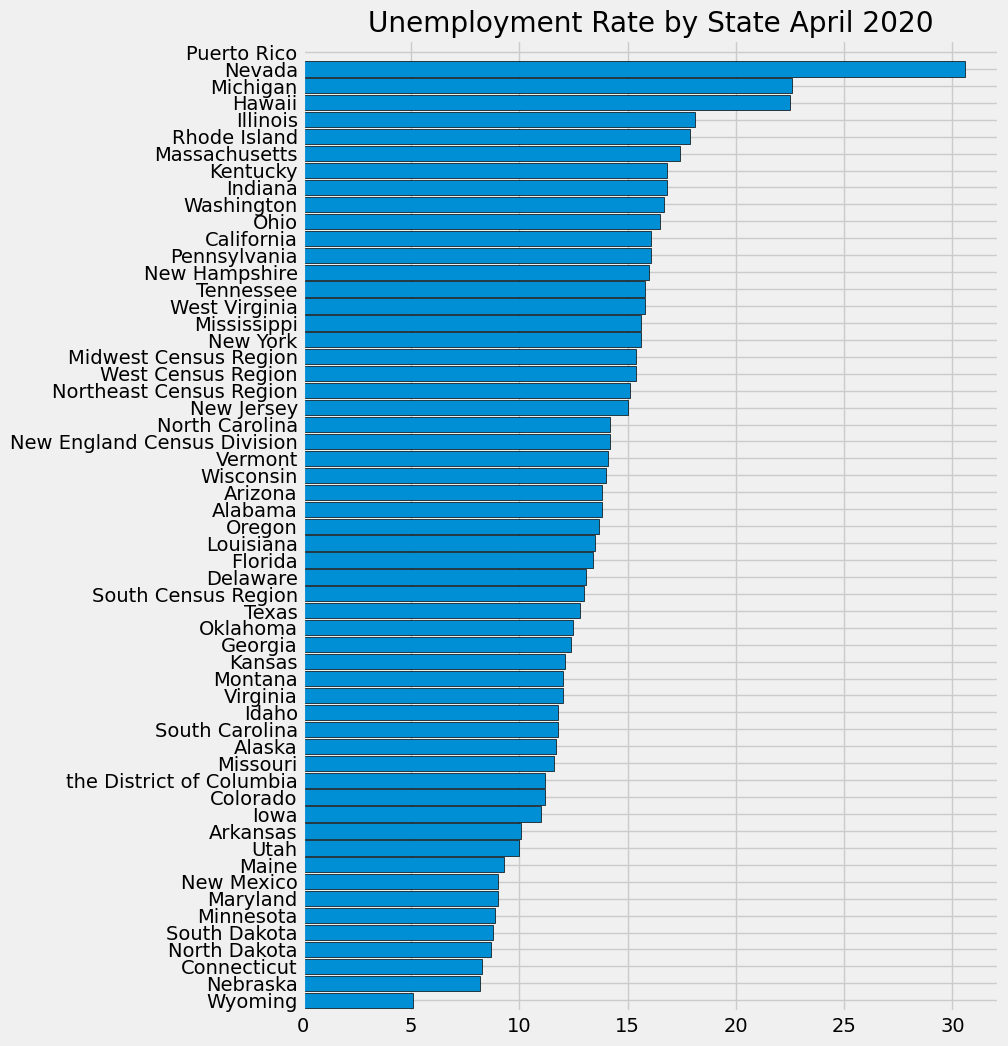

In [ ]:
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]
ax = uemp_states.loc[uemp_states.index == '2020-4-01'].T.sort_values('2020-04-01').plot(kind='barh', figsize = (8,12), width = 0.9, edgecolor = 'black', title ='Unemployment Rate by State April 2020')
ax.legend().remove()
plt.show()

In [ ]:
unemp_df = unemp_df[unemp_df['title'].index.str.contains('UR')]

In [ ]:
unemp_df

id realtime_start realtime_end  \
series id                                       
CAUR         CAUR     2024-04-16   2024-04-16   
TXUR         TXUR     2024-04-16   2024-04-16   
NYUR         NYUR     2024-04-16   2024-04-16   
FLUR         FLUR     2024-04-16   2024-04-16   
PAUR         PAUR     2024-04-16   2024-04-16   
OHUR         OHUR     2024-04-16   2024-04-16   
MIUR         MIUR     2024-04-16   2024-04-16   
ALUR         ALUR     2024-04-16   2024-04-16   
MAUR         MAUR     2024-04-16   2024-04-16   
NCUR         NCUR     2024-04-16   2024-04-16   
ILUR         ILUR     2024-04-16   2024-04-16   
NJUR         NJUR     2024-04-16   2024-04-16   
GAUR         GAUR     2024-04-16   2024-04-16   
COUR         COUR     2024-04-16   2024-04-16   
AZUR         AZUR     2024-04-16   2024-04-16   
WIUR         WIUR     2024-04-16   2024-04-16   
VAUR         VAUR     2024-04-16   2024-04-16   
KYUR         KYUR     2024-04-16   2024-04-16   
SCUR         SCUR     2024-04-16   2024-04-16   
NMUR         NMUR     2024-04-16   2024-04-16   
MNUR         MNUR     2024-04-16   2024-04-16   
TNUR         TNUR     2024-04-16   2024-04-16   
WAUR         WAUR     2024-04-16   2024-04-16   
MDUR         MDUR     2024-04-16   2024-04-16   
ORUR         ORUR     2024-04-16   2024-04-16   
WVUR         WVUR     2024-04-16   2024-04-16   
NVUR         NVUR     2024-04-16   2024-04-16   
ARUR         ARUR     2024-04-16   2024-04-16   
OKUR         OKUR     2024-04-16   2024-04-16   
MOUR         MOUR     2024-04-16   2024-04-16   
AKUR         AKUR     2024-04-16   2024-04-16   
IAUR         IAUR     2024-04-16   2024-04-16   
UTUR         UTUR     2024-04-16   2024-04-16   
PRUR         PRUR     2024-04-16   2024-04-16   
INUR         INUR     2024-04-16   2024-04-16   
LAUR         LAUR     2024-04-16   2024-04-16   
HIUR         HIUR     2024-04-16   2024-04-16   
NDUR         NDUR     2024-04-16   2024-04-16   
MTUR         MTUR     2024-04-16   2024-04-16   
DCUR         DCUR     2024-04-16   2024-04-16   
MSUR         MSUR     2024-04-16   2024-04-16   
MEUR         MEUR     2024-04-16   2024-04-16   
NEUR         NEUR     2024-04-16   2024-04-16   
CTUR         CTUR     2024-04-16   2024-04-16   
IDUR         IDUR     2024-04-16   2024-04-16   
NHUR         NHUR     2024-04-16   2024-04-16   
RIUR         RIUR     2024-04-16   2024-04-16   
KSUR         KSUR     2024-04-16   2024-04-16   
WYUR         WYUR     2024-04-16   2024-04-16   
DEUR         DEUR     2024-04-16   2024-04-16   
VTUR         VTUR     2024-04-16   2024-04-16   
SDUR         SDUR     2024-04-16   2024-04-16   
CMWRUR     CMWRUR     2024-04-16   2024-04-16   
CSOUUR     CSOUUR     2024-04-16   2024-04-16   
CNERUR     CNERUR     2024-04-16   2024-04-16   
CWSTUR     CWSTUR     2024-04-16   2024-04-16   
CNEWUR     CNEWUR     2024-04-16   2024-04-16   

                                                      title observation_start  \
series id                                                                       
CAUR                        Unemployment Rate in California        1976-01-01   
TXUR                             Unemployment Rate in Texas        1976-01-01   
NYUR                          Unemployment Rate in New York        1976-01-01   
FLUR                           Unemployment Rate in Florida        1976-01-01   
PAUR                      Unemployment Rate in Pennsylvania        1976-01-01   
OHUR                              Unemployment Rate in Ohio        1976-01-01   
MIUR                          Unemployment Rate in Michigan        1976-01-01   
ALUR                           Unemployment Rate in Alabama        1976-01-01   
MAUR                     Unemployment Rate in Massachusetts        1976-01-01   
NCUR                    Unemployment Rate in North Carolina        1976-01-01   
ILUR                          Unemployment Rate in Illinois        1976-01-01   
NJUR                        Unemployment Rate in New Jersey        197

In [ ]:
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
id_to_state

{'CAUR': 'California',
 'TXUR': 'Texas',
 'NYUR': 'New York',
 'FLUR': 'Florida',
 'PAUR': 'Pennsylvania',
 'OHUR': 'Ohio',
 'MIUR': 'Michigan',
 'ALUR': 'Alabama',
 'MAUR': 'Massachusetts',
 'NCUR': 'North Carolina',
 'ILUR': 'Illinois',
 'NJUR': 'New Jersey',
 'GAUR': 'Georgia',
 'COUR': 'Colorado',
 'AZUR': 'Arizona',
 'WIUR': 'Wisconsin',
 'VAUR': 'Virginia',
 'KYUR': 'Kentucky',
 'SCUR': 'South Carolina',
 'NMUR': 'New Mexico',
 'MNUR': 'Minnesota',
 'TNUR': 'Tennessee',
 'WAUR': 'Washington',
 'MDUR': 'Maryland',
 'ORUR': 'Oregon',
 'WVUR': 'West Virginia',
 'NVUR': 'Nevada',
 'ARUR': 'Arkansas',
 'OKUR': 'Oklahoma',
 'MOUR': 'Missouri',
 'AKUR': 'Alaska',
 'IAUR': 'Iowa',
 'UTUR': 'Utah',
 'PRUR': 'Puerto Rico',
 'INUR': 'Indiana',
 'LAUR': 'Louisiana',
 'HIUR': 'Hawaii',
 'NDUR': 'North Dakota',
 'MTUR': 'Montana',
 'DCUR': 'the District of Columbia',
 'MSUR': 'Mississippi',
 'MEUR': 'Maine',
 'NEUR': 'Nebraska',
 'CTUR': 'Connecticut',
 'IDUR': 'Idaho',
 'NHUR': 'New Hampshire

In [ ]:
#uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [ ]:
uemp_states

California  Texas  New York  Florida  Pennsylvania  Ohio  \
1929-04-01         NaN    NaN       NaN      NaN           NaN   NaN   
1929-05-01         NaN    NaN       NaN      NaN           NaN   NaN   
1929-06-01         NaN    NaN       NaN      NaN           NaN   NaN   
1929-07-01         NaN    NaN       NaN      NaN           NaN   NaN   
1929-08-01         NaN    NaN       NaN      NaN           NaN   NaN   
...                ...    ...       ...      ...           ...   ...   
2023-11-01         5.1    3.9       4.6      3.1           3.4   3.6   
2023-12-01         5.1    3.9       4.6      3.1           3.4   3.6   
2024-01-01         5.2    3.9       4.5      3.1           3.4   3.7   
2024-02-01         5.3    3.9       4.4      3.1           3.4   3.7   
2024-03-01         NaN    NaN       NaN      NaN           NaN   NaN   

            Michigan  Alabama  Massachusetts  North Carolina  Illinois  \
1929-04-01       NaN      NaN            NaN             NaN       NaN   
1929-05-01       NaN      NaN            NaN             NaN       NaN   
1929-06-01       NaN      NaN            NaN             NaN       NaN   
1929-07-01       NaN      NaN            NaN             NaN       NaN   
1929-08-01       NaN      NaN            NaN             NaN       NaN   
...              ...      ...            ...             ...       ...   
2023-11-01       4.1      2.8            3.3             3.6       4.7   
2023-12-01       4.1      2.8            3.2             3.6       4.7   
2024-01-01       4.0      2.9            3.0             3.5       4.7   
2024-02-01       3.9      3.0            2.9             3.5       4.8   
2024-03-01       NaN      NaN            NaN             NaN       NaN   

            New Jersey  Georgia  Colorado  Arizona  Wisconsin  Virginia  \
1929-04-01         NaN      NaN       NaN      NaN        NaN       NaN   
1929-05-01         NaN      NaN       NaN      NaN        NaN       NaN   
1929-06-01         NaN      NaN       NaN      NaN        NaN       NaN   
1929-07-01         NaN      NaN       NaN      NaN        NaN       NaN   
1929-08-01         NaN      NaN       NaN      NaN        NaN       NaN   
...                ...      ...       ...      ...        ...       ...   
2023-11-01         4.8      3.2       3.3      4.2        3.4       3.1   
2023-12-01         4.8      3.2       3.3      4.2        3.4       3.0   
2024-01-01         4.8      3.1       3.4      4.2        3.2       3.0   
2024-02-01         4.8      3.1       3.5      4.1        3.0       3.0   
2024-03-01         NaN      NaN       NaN      NaN        NaN       NaN   

            Kentucky  South Carolina  New Mexico  Minnesota  Tennessee  \
1929-04-01       NaN             NaN         NaN        NaN        NaN   
1929-05-01       NaN             NaN         NaN        NaN        NaN   
1929-06-01       NaN             NaN         NaN        NaN        NaN   
1929-07-01       NaN             NaN         NaN        NaN        NaN   
1929-08-01       NaN             NaN         NaN        NaN        NaN   
...              ...             ...         ...        ...        ...   
2023-11-01       4.3             3.0         4.0        2.7        3.5   
2023-12-01       4.3             3.0         4.0        2.7        3.4   
2024-01-01       4.3             3.0         4.0        2.7        3.5   
2024-02-01       4.4             3.1         3.9        2.7        3.3   
2024-03-01       NaN             NaN         NaN        NaN        NaN   

            Washington  Maryland  Oregon  West Virginia  Nevada  Arkansas  \
1929-04-01         NaN       NaN     NaN            NaN     NaN       NaN   
1929-05-01         NaN       NaN     NaN            NaN     NaN       NaN   
1929-06-01         NaN       NaN     NaN            NaN     NaN       NaN   
1929-07-01         NaN       NaN     NaN            NaN     NaN       NaN   
1929-08-01         NaN       NaN     NaN            NaN     NaN       NaN   
...   

## Pull Participation of Employment Rate

In [ ]:
part_df = fred.search('participation rate state', filter = ('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [ ]:
part_df

id realtime_start realtime_end  \
series id                                                      
CIVPART                  CIVPART     2024-04-16   2024-04-16   
LNS11300060          LNS11300060     2024-04-16   2024-04-16   
LNS11300002          LNS11300002     2024-04-16   2024-04-16   
LNS11300001          LNS11300001     2024-04-16   2024-04-16   
LNS11324230          LNS11324230     2024-04-16   2024-04-16   
...                          ...            ...          ...   
LRACTTMAUSM156S  LRACTTMAUSM156S     2024-04-16   2024-04-16   
LRINTTMAUSM156S  LRINTTMAUSM156S     2024-04-16   2024-04-16   
LRINTTFEUSM156S  LRINTTFEUSM156S     2024-04-16   2024-04-16   
LRACTTTTUSM156S  LRACTTTTUSM156S     2024-04-16   2024-04-16   
LRINTTTTUSM156S  LRINTTTTUSM156S     2024-04-16   2024-04-16   

                                                             title  \
series id                                                            
CIVPART                             Labor Force Participation Rate   
LNS11300060            Labor Force Participation Rate - 25-54 Yrs.   
LNS11300002                 Labor Force Participation Rate - Women   
LNS11300001                   Labor Force Participation Rate - Men   
LNS11324230        Labor Force Participation Rate - 55 Yrs. & over   
...                                                            ...   
LRACTTMAUSM156S  Activity Rate: Aged 15 and over: Males for Uni...   
LRINTTMAUSM156S  Inactivity Rate: Aged 15 and over: Males for U...   
LRINTTFEUSM156S  Inactivity Rate: Aged 15 and over: Females for...   
LRACTTTTUSM156S  Activity Rate: Aged 15 and over: All Persons f...   
LRINTTTTUSM156S  Inactivity Rate: Aged 15 and over: All Persons...   

                observation_start observation_end frequency frequency_short  \
series id                                                                     
CIVPART                1948-01-01      2024-03-01   Monthly               M   
LNS11300060            1948-01-01      2024-03-01   Monthly               M   
LNS11300002            1948-01-01      2024-03-01   Monthly               M   
LNS11300001            1948-01-01      2024-03-01   Monthly               M   
LNS11324230            1948-01-01      2024-03-01   Monthly               M   
...                           ...             ...       ...             ...   
LRACTTMAUSM156S        1955-01-01      2024-03-01   Monthly               M   
LRINTTMAUSM156S        1975-01-01      2024-03-01   Monthly               M   
LRINTTFEUSM156S        1975-01-01      2024-03-01   Monthly               M   
LRACTTTTUSM156S        1955-01-01      2024-03-01   Monthly               M   
LRINTTTTUSM156S        1975-01-01      2024-03-01   Monthly               M   

                   units units_short  seasonal_adjustment  \
series id                                                   
CIVPART          Percent           %  Seasonally Adjusted   
LNS11300060      Percent           %  Seasonally Adjusted   
LNS11300002      Percent           %  Seasonally Adjusted   
LNS11300001      Percent           %  Seasonally Adjusted   
LNS11324230      Percent           %  Seasonally Adjusted   
...                  ...         ...                  ...   
LRACTTMAUSM156S  Percent           %  Seasonally Adjusted   
LRINTTMAUSM156S  Percent           %  Seasonally Adjusted   
LRINTTFEUSM156S  Percent           %  Seasonally Adjusted   
LRACTTTTUSM156S  Percent           %  Seasonally Adjusted   
LRINTTTTUSM156S  Percent           %  Seasonally Adjusted   

                seasonal_adjustment_short              last_updated  \
series id                                                             
CIVPART                                SA 2024-04-05 07:51:02-05:00   
LNS11300060                            SA 2024-04-05 07:50:19-05:00   
LNS11300002                            SA 2024-04-05 07:51:03-05:00   
LNS11300001                            SA 2024-04-05 07:51:05-05:00   
LNS11324230                           

In [ ]:
# Remove All not states
part_df = part_df[part_df.index.str.contains('LBS')]

In [ ]:
#Get the states name and turn to dictionary
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()
# part_id_to_state

In [ ]:
all_results_part=[]
for myid in part_df.index:
  results = fred.get_series(myid)
  results = results.to_frame(name=myid)
  all_results_part.append(results)
part_states = pd.concat(all_results_part, axis = 1 )
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [ ]:
px.line(part_states)

## Plot Unemployment vs Participation

In [ ]:
#Clean the data for colombia
uemp_states=uemp_states.rename(columns = {'the District of Columbia' : 'District Of Columbia'})
for states in uemp_states.columns:
  if states not in part_states.columns:
    print(states)
    uemp_states = uemp_states.drop(states,axis = 1)

Puerto Rico
Midwest Census Region
South Census Region
Northeast Census Region
West Census Region
New England Census Division


In [ ]:
uemp_states.columns.shape

(51,)

In [ ]:
part_states.columns.shape

(51,)

In [ ]:
# fig, axs = plt.subplots()
# ax2 = ax.twinx()
# uemp_states.query('index >= 2020 and index < 2024')['New York'].plot(ax =ax, label = 'Unemployment')
# part_states.query('index >= 2020 and index < 2024')['New York'].plot(ax =ax2, label = 'Participation', color = color_pal[1])
# ax2.grid(False)
# ax.set_title('New York')

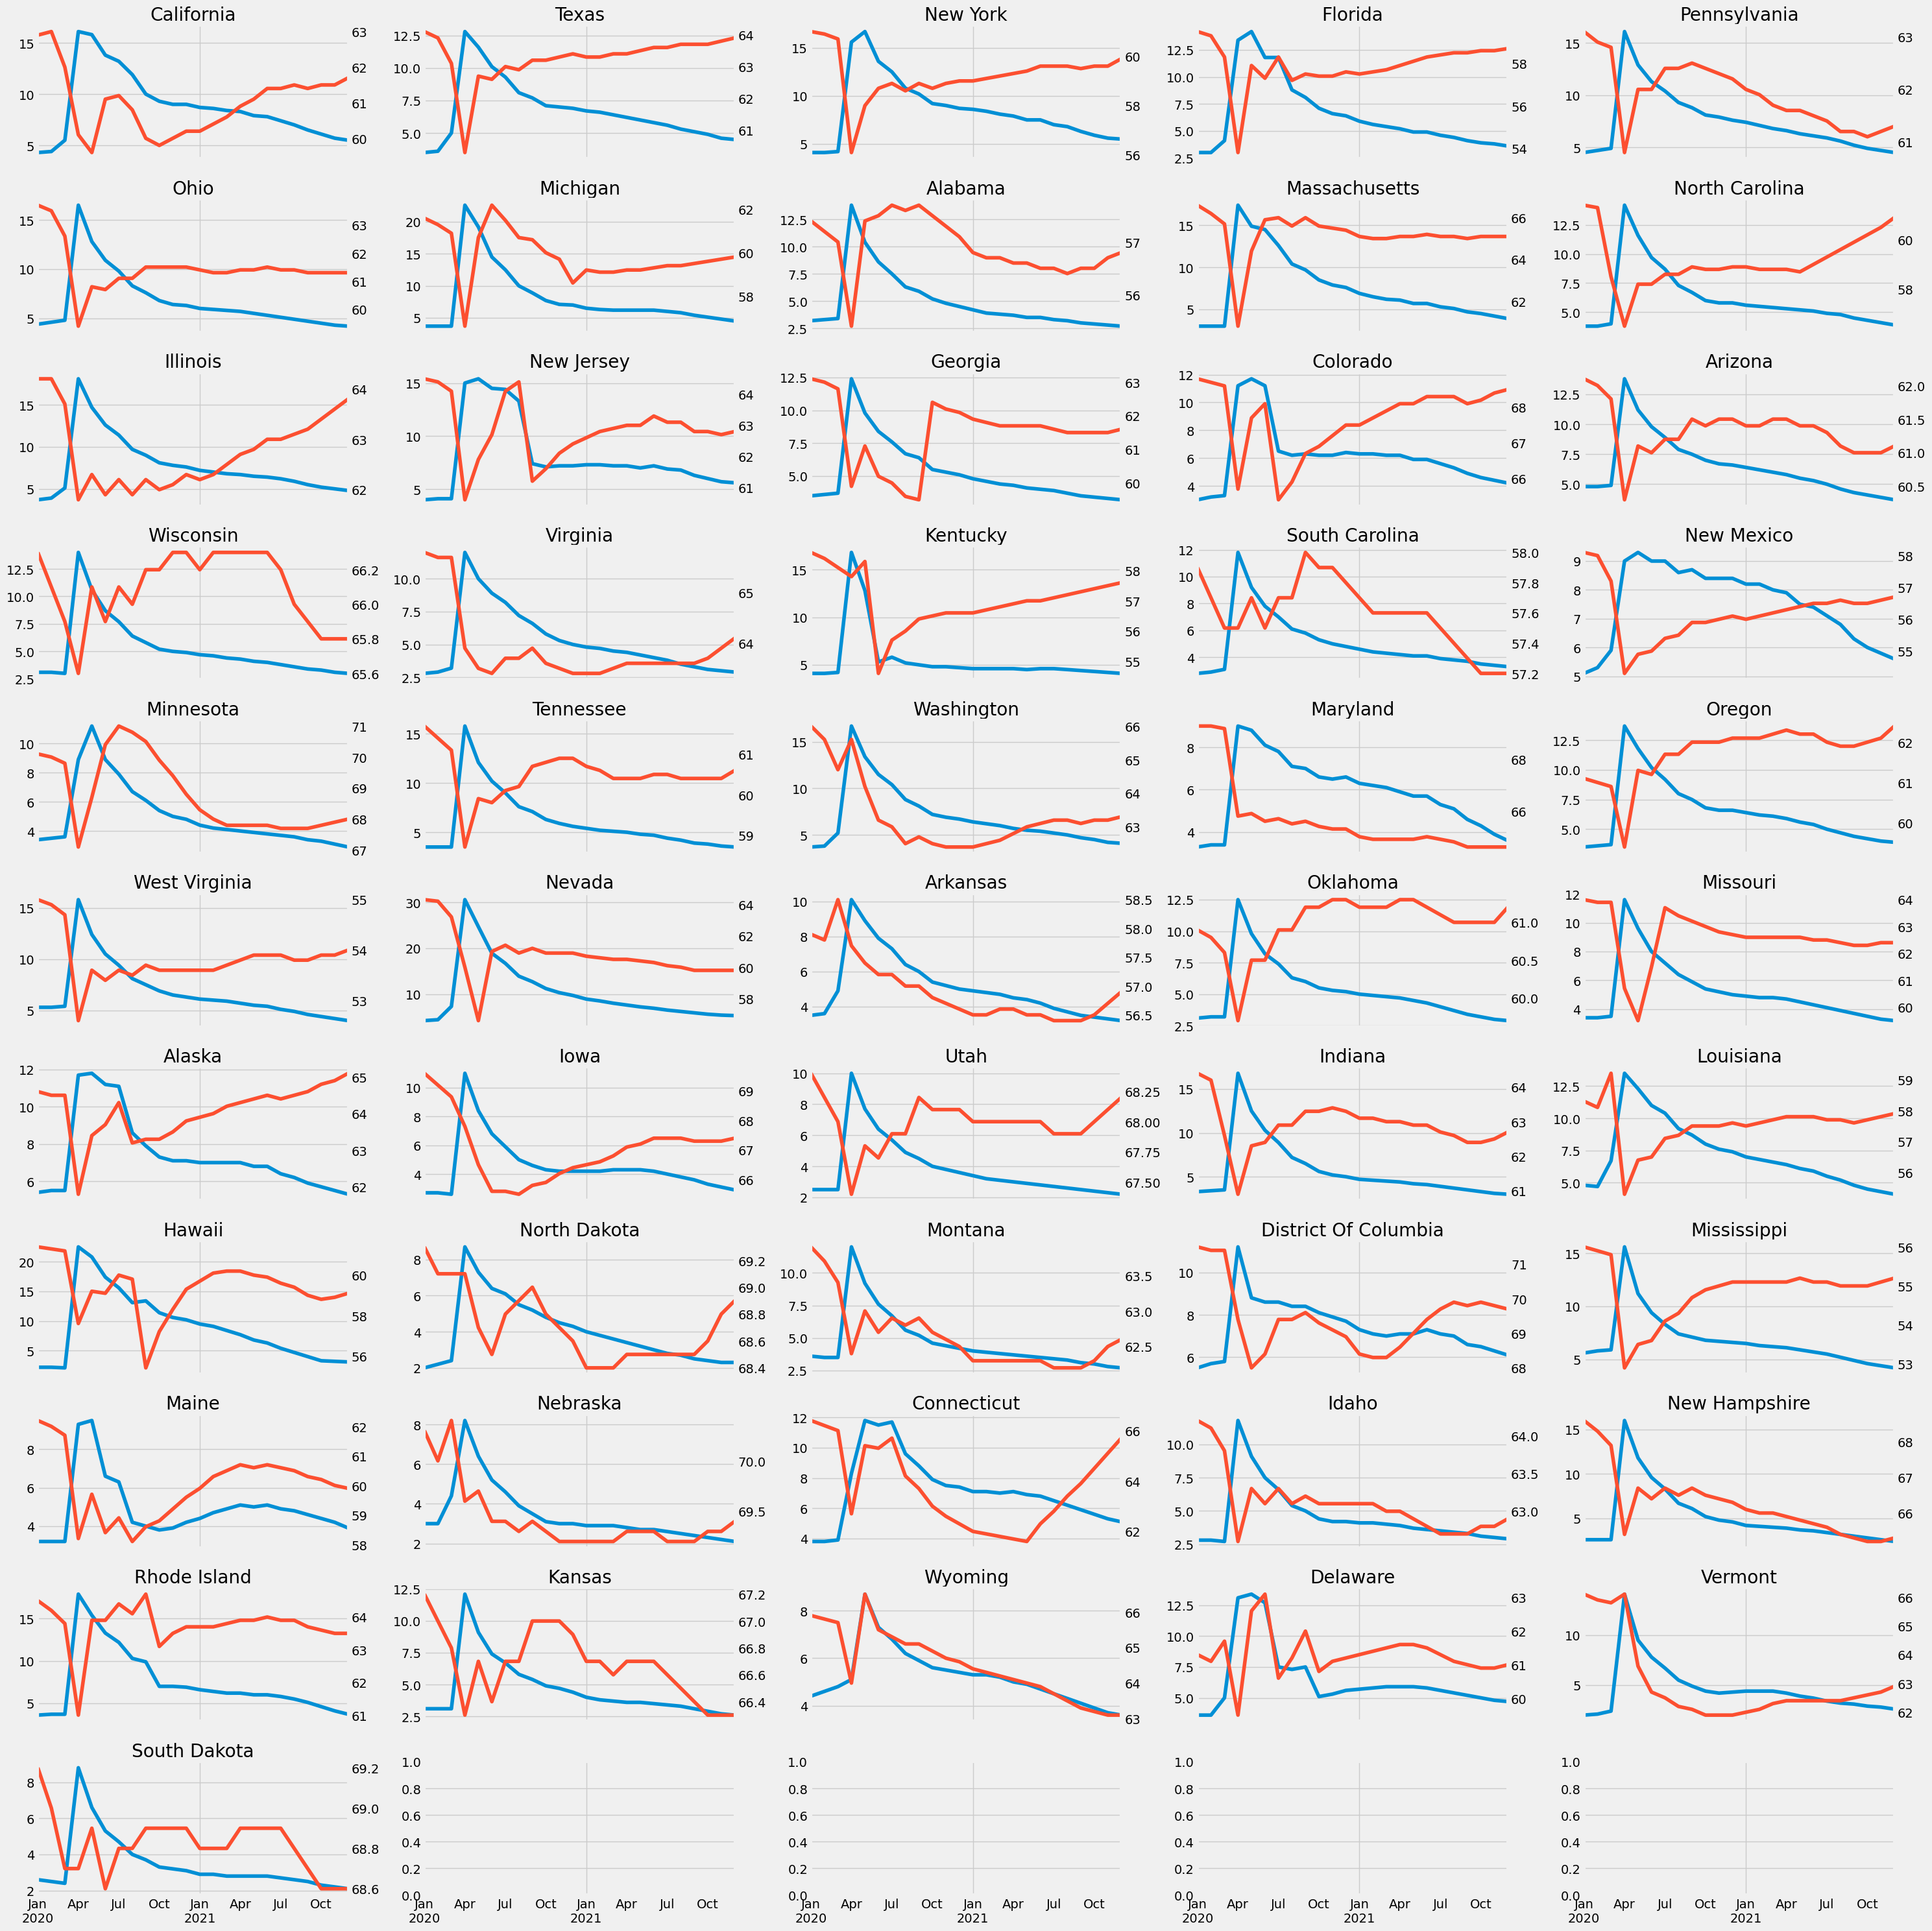

In [ ]:
fig, axs = plt.subplots(11, 5, figsize = (30, 30), sharex=True)
axs = axs.flatten()
i = 0
for state in uemp_states.columns:
  ax2 = axs[i].twinx()
  uemp_states.query('index >= 2020 and index < 2022')[state].plot(ax =axs[i], label = 'Unemployment')
  part_states.query('index >= 2020 and index < 2022')[state].plot(ax =ax2, label = 'Participation', color = color_pal[1])
  ax2.grid(False)
  axs[i].set_title(state)
  i+=1
plt.tight_layout()
plt.show()
